Network X Code goes here, now we convert it into a graph

Topology Stats:
Density: 0.22727272727272727
Avg. shortest path length: 2.5
Avg. clustering coefficient: 0.13888888888888887
Assortativity -0.2605042016806722

Assortativity Stats:
12
0.2097902097902098
Erdos-Renyi assortativity: -0.27066402783886806 0.20404634005757952
Conf. model assortativity: 0.007311614933815332 0.2176681530119053
Real network value: -0.2605042016806722

Page Rank Weights
      name     value
1   ATLAng  0.132220
5   IPLSng  0.097529
9   SNVAng  0.095919
4   HSTNng  0.095611
3   DNVRng  0.094565
6   KSCYng  0.094016
8   NYCMng  0.073284
11  WASHng  0.071743
2   CHINng  0.071279
7   LOSAng  0.066766
10  STTLng  0.066470
0   ATLAM5  0.040597


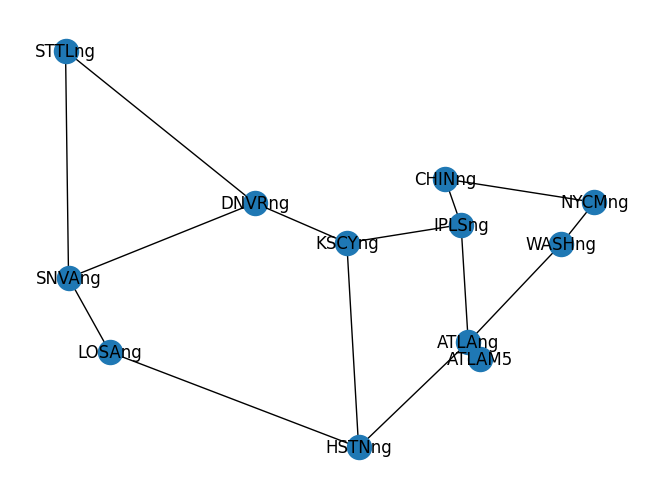

In [7]:
##Instal packages ex: python3.11 -m pip install pandas  

# Importing required libraries
import random
import networkx as nx   # for creating and manipulating graphs
import matplotlib.pyplot as plt   # for visualizing graphs

# Importing required functions
import PerformanceAnalysis.Fun_Measure_Statistics as Fun_Measure_Statistics  # to measure network statistics
import SearchAlgos.SearchAlgorithm_PageRank as  SearchAlgorithm_PageRank  # to compute node rankings based on pagerank

# Importing a user-defined function to read network data from XML file
from Import_NetworkFromXML import *

# Defining a function to convert nodes in the XML network dictionary to nodes in networkx graph
def convert_nodes (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))

# Defining a function to convert links in the XML network dictionary to edges in networkx graph
def convert_links (G, nodes, links):
    for link in links.keys():
        source = links[link].get("source")
        for source_node in nodes:
            if nodes[source_node].get('id') == source:
                break
        dest = links[link].get("destination")
        for dest_node in nodes:
            if nodes[dest_node].get('id') == dest:
                break
        capacity = links[link].get("capacity")
        cost = links[link].get("cost")
        G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])

# Defining a function to convert demands in the XML network dictionary to networkx graph
def convert_demands(G, nodes, demands):    
    a = 1

# Defining a function to create random users in the networkx graph
def create_users (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        randx = random.randint(x_cor,x_cor+x_cor*2)
        randy = random.randint(y_cor,y_cor+y_cor*2)
        print(randx)
        print(randy)

# Defining the name of the network and creating an empty networkx graph
network_name = "abilene.xml"
G = nx.Graph()

# Defining the path to the network XML file and reading the network data from the file
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

# Extracting nodes, links, and demands data from the network data dictionary
nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

# Converting nodes and links data to nodes and edges in networkx graph
convert_nodes(G,nodes)
convert_links(G,nodes,links)

# Calculating shortest paths between all pairs of nodes in the networkx graph
sp = dict(nx.all_pairs_shortest_path(G))

# Drawing the networkx graph with node positions and other attributes
nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, node_size=300, style = "solid")

# calling the measure_statistics function and passing the networkx graph G as a parameter
Fun_Measure_Statistics.topology_statistics(G)

# calling the assortativity_measure function and passing the networkx graph G as a parameter
Fun_Measure_Statistics.assortativity_measure(G)

pagerank_df = SearchAlgorithm_PageRank.compute_pagerank(G)
print("Page Rank Weights")
print(pagerank_df)



# Approximations and Heuristics
Approximations of graph properties and Heuristic methods for optimization.

# import
These functions can be accessed using networkx.approximation.function_name

They can be imported using from networkx.algorithms import approximation or from networkx.algorithms.approximation import function_name

# Treewidth
Functions for computing treewidth decomposition.

Treewidth of an undirected graph is a number associated with the graph. It can be defined as the size of the largest vertex set (bag) in a tree decomposition of the graph minus one.

Wikipedia: Treewidth

treewidth_min_degree(G): Returns a treewidth decomposition using the Minimum Degree heuristic.

In [8]:
from networkx.algorithms import approximation as algos
algos.treewidth_min_degree(G)

(2, <networkx.classes.graph.Graph at 0x12fcb8c50>)

## To Implement:
1. Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. Allow options (ex. User_Spread).
2. Connect each user to nearest AP: Allow options (ex. SNR, Connected_Users, Access_Technology).
3. Generate demand for each user: Assign User -> Application (Define SFCn = {VNF1 + VNF2 + .... + VNFx}).
4. Create Placement Algorithm for each Placement Solution.
5. Create a Next Candidate Search Algorithm: Takes as an input (G, Users, Demamds).
6. Measure network statistics for each Placement Algorithm.
7. Generate logs for each Placement Algorithm.
8. Save logs in an output file.
9. Create function to plot from the logs.

## Generate Users
Here we will generate users

Generate Users: Randomly distrubuted users generated with uniform random distrubution of (x,y) corrdinates around the graph G that represents infrastrcuture. 

Allow options (ex. User_Spread).

[(0, {'pos': (-121.64, 37.33)}), (1, {'pos': (-103.74, 46.24)}), (2, {'pos': (-112.96, 43.91)}), (3, {'pos': (-74.63, 35.74)}), (4, {'pos': (-90.01, 31.73)}), (5, {'pos': (-119.11, 43.59)}), (6, {'pos': (-98.82, 35.11)}), (7, {'pos': (-76.56, 42.22)}), (8, {'pos': (-87.55, 37.5)}), (9, {'pos': (-92.59, 46.63)}), (10, {'pos': (-85.02, 32.55)}), (11, {'pos': (-84.35, 30.8)}), (12, {'pos': (-81.69, 37.95)}), (13, {'pos': (-86.36, 34.72)}), (14, {'pos': (-100.23, 31.38)}), (15, {'pos': (-113.31, 32.8)}), (16, {'pos': (-106.44, 33.76)}), (17, {'pos': (-88.76, 32.3)}), (18, {'pos': (-116.69, 33.2)}), (19, {'pos': (-108.63, 31.84)}), (20, {'pos': (-107.86, 43.44)}), (21, {'pos': (-101.1, 36.66)}), (22, {'pos': (-107.4, 36.47)}), (23, {'pos': (-88.49, 31.29)}), (24, {'pos': (-104.4, 40.75)}), (25, {'pos': (-80.37, 41.47)}), (26, {'pos': (-108.57, 37.84)}), (27, {'pos': (-121.9, 35.03)}), (28, {'pos': (-97.74, 36.01)}), (29, {'pos': (-78.07, 45.87)}), (30, {'pos': (-85.9, 33.53)}), (31, {'pos':

{}

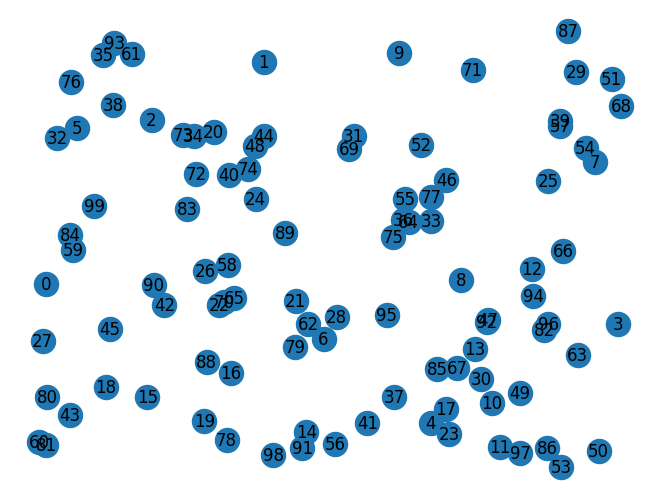

In [9]:
#print(links.keys())
#print(nodes.keys())
#print(demands.keys())



NoOfUsers = 100

G_users = nx.Graph()



#to distrubute users across infra. determine first max & min (x,y) corrd. This maps a 2x2 grid, to distrbute users around
max_x = -float('inf')
min_x = float('inf')
max_y = -float('inf')
min_y = float('inf')

for node in nodes:
    node_id = nodes[node].get("id")
    x_cor = nodes[node].get("x_cor")
    if x_cor < min_x:
        min_x = x_cor
    if x_cor > max_x:
        max_x = x_cor
    y_cor = nodes[node].get("y_cor")
    if y_cor < min_y:
        min_y = y_cor
    if y_cor > max_y:
        max_y = y_cor
#DEBUG: CHECK (X,Y) VALUES OF GENERATED USERS
#print('max_x: ', max_x)
#print('min_x: ', min_x)
#print('max_y: ', max_y)
#print('min_y: ', min_y)


for u in range(NoOfUsers):
    randx = round(random.uniform(min_x, max_x), 2)
    #print(randx)
    randy = round(random.uniform(min_y, max_y), 2)
    #print(randy)
    G_users.add_node(u, pos=(randx, randy))
    
nx.draw(G_users, nx.get_node_attributes(G_users, 'pos'), with_labels=True, node_size=300, style = "solid")

#width=5, edge_color="skyblue", style="solid")

#print users + corrdinates
print(G_users.nodes.data())

G_users.graph

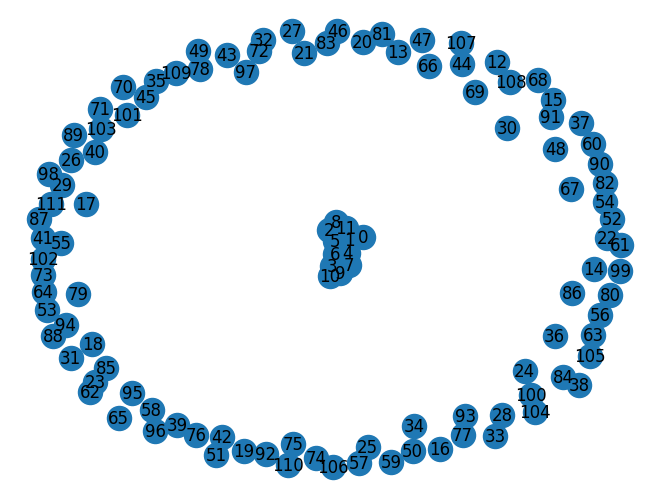

In [10]:
#Combine users + infra graph 
# 
Un= nx.disjoint_union(G,G_users)
Un.nodes()

#nx.draw(Un, nx.get_node_attributes(Un, 'pos'), with_labels=True, node_size=300, style = "solid")

nx.draw(Un, with_labels=True)

#TO DO:
#-Connect users to the neasret AP
#-Plot users + connections + nodes in a beautiful way on same graph


# Add nodes to the graph, with the 'pos' attribute set to the latitude and longitude
#for i, node_data in enumerate(nodes_data):
#    G_users.add_node(i, pos=node_data['pos'])
#
# Draw the graph
# pos = nx.get_node_attributes(G_users, 'pos')
# nx.draw(G_users, pos, with_labels=False)
# plt.show()

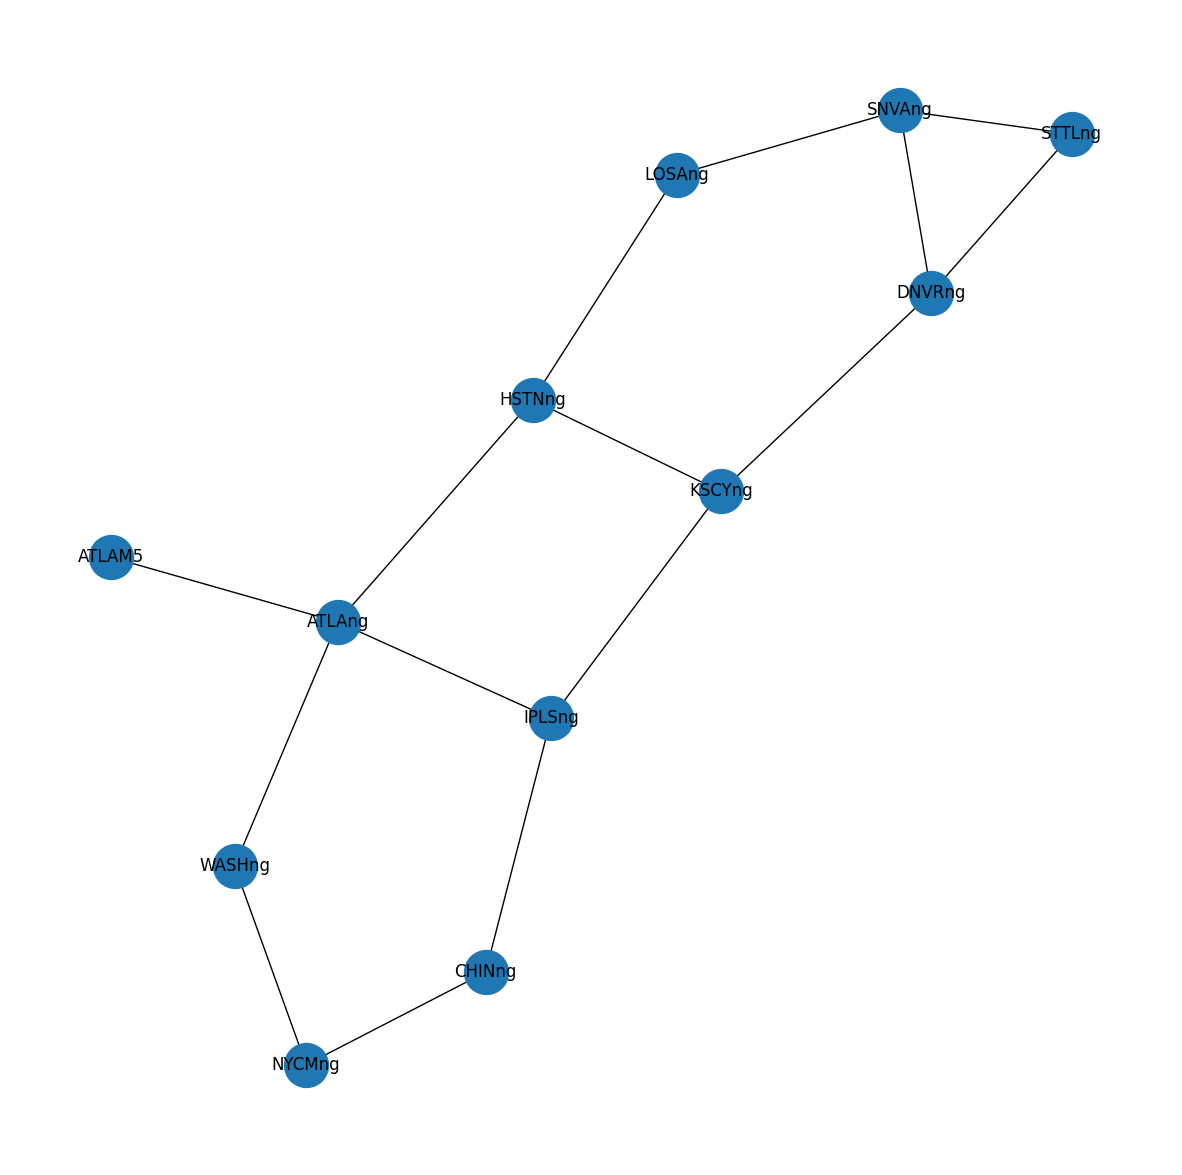

In [11]:
import networkx as nx
import matplotlib.pyplot as plt
from Import_NetworkFromXML import *
import random

def convert_nodes (G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))

def convert_links (G, nodes, links):
    for link in links.keys():
        source = links[link].get("source")
        for source_node in nodes:
            if nodes[source_node].get('id') == source:
                break
        dest = links[link].get("destination")
        for dest_node in nodes:
            if nodes[dest_node].get('id') == dest:
                break
        capacity = links[link].get("capacity")
        cost = links[link].get("cost")
        G.add_edges_from([(source, dest, {'capacity': capacity, 'cost': cost})])

def convert_demands(G, nodes, demands):    
    a = 1

NoOfUsers = 100

G_users = nx.Graph()

network_name = "abilene.xml"
G = nx.Graph()
path = 'Networks/'
from_xml = read_XMLnetwork (path+network_name)

nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

convert_nodes(G,nodes)
convert_links(G,nodes,links)

#to distrubute users across infra. determine first max & min (x,y) corrd. This maps a 2x2 grid, to distrbute users around
max_x = -float('inf')
min_x = float('inf')
max_y = -float('inf')
min_y = float('inf')

for node in nodes:
    node_id = nodes[node].get("id")
    x_cor = nodes[node].get("x_cor")
    if x_cor < min_x:
        min_x = x_cor
    if x_cor > max_x:
        max_x = x_cor
    y_cor = nodes[node].get("y_cor")
    if y_cor < min_y:
        min_y = y_cor
    if y_cor > max_y:
        max_y = y_cor

for i in range(NoOfUsers):
    randx = random.uniform(min_x, max_x)
    randy = random.uniform(min_y, max_y)
    G_users.add_node(i, pos=(randx, randy))

#final all shortest path pairs
sp = dict(nx.all_pairs_shortest_path(G))

#print(nx.info(G))

fig, ax = plt.subplots(figsize=(15,15))

nx.draw(G, with_labels=True, node_size=1000, ax=ax)

plt.show()

#pos = nx.spring_layout(G)
#fig, ax = plt.subplots(figsize=(15,15))

#nx.draw_networkx_nodes(G, pos, ax=ax)
#nx.draw_networkx_edges(G, pos, ax=ax)
#nx.draw_networkx_nodes(G_users, pos, node_color='r', ax=ax)
#nx.draw_networkx_edges(G_users, pos, edge_color='r', ax=ax)

#plt.show()



NetworkXError: Node 'ATLAM5' has no position.

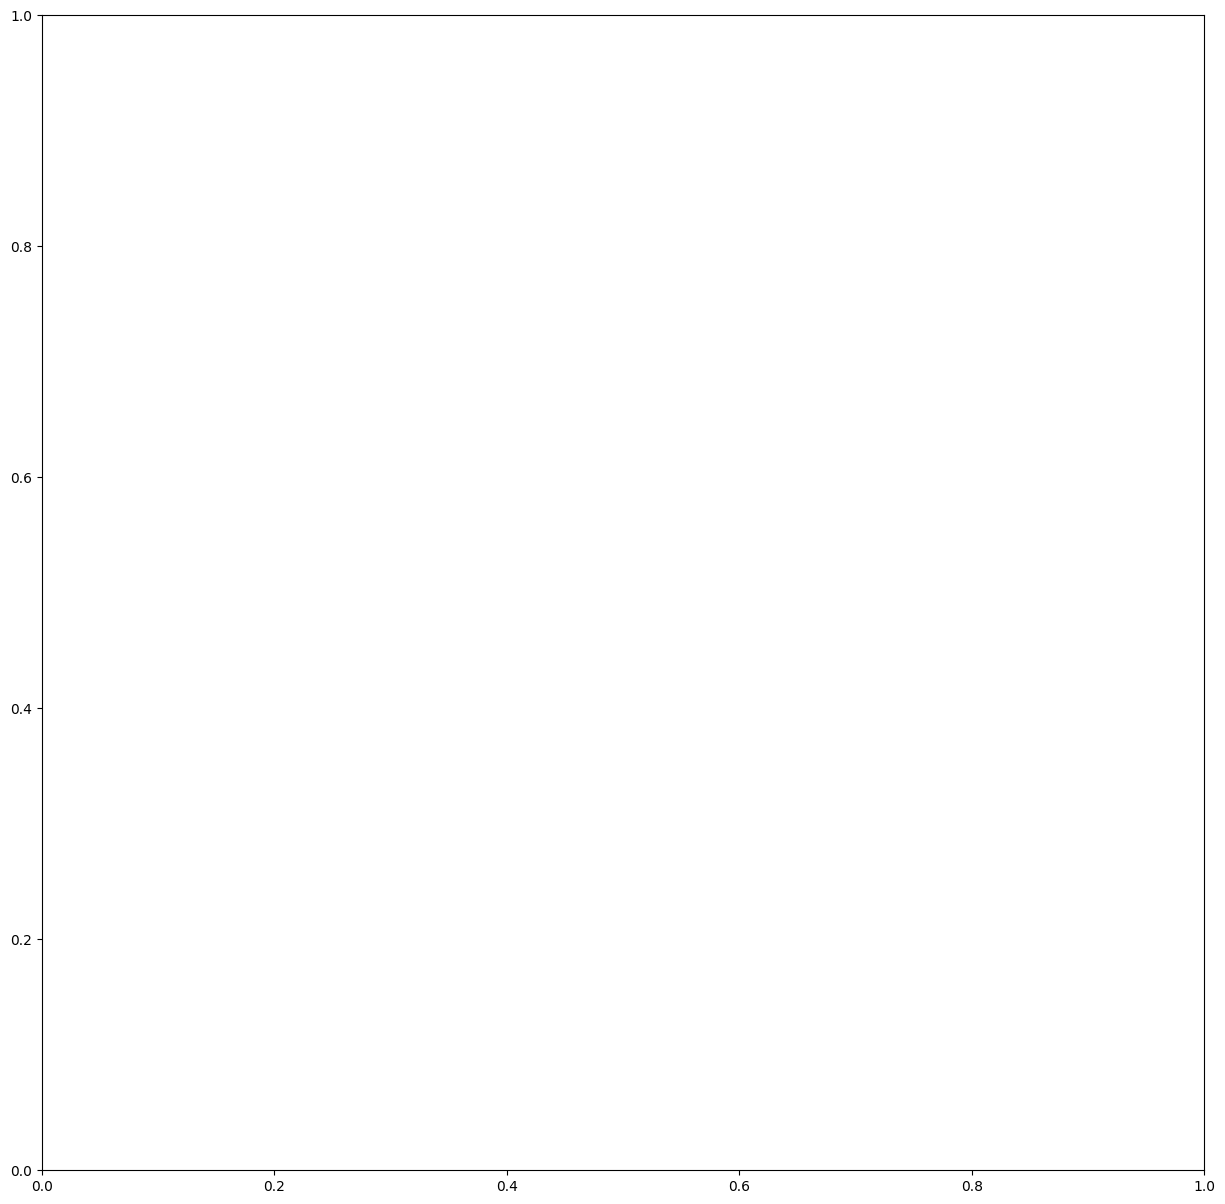

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from Import_NetworkFromXML import *
import random

def convert_nodes(G, nodes):
    for node in nodes:
        node_id = nodes[node].get("id")
        x_cor = nodes[node].get("x_cor")
        y_cor = nodes[node].get("y_cor")
        G.add_node(node_id, pos=(x_cor, y_cor))

def convert_links(G, nodes, links):
    for link in links.keys():
        source = links[link].get("source")
        for source_node in nodes:
            if nodes[source_node].get('id') == source:
                break
        dest = links[link].get("destination")
        for dest_node in nodes:
            if nodes[dest_node].get('id') == dest:
                break
        capacity = links[link].get("capacity")
        cost = links[link].get("cost")
        G.add_edge(source, dest, capacity=capacity, cost=cost)

NoOfUsers = 100

G_users = nx.Graph()

network_name = "abilene.xml"
G = nx.Graph()
path = 'Networks/'
from_xml = read_XMLnetwork(path + network_name)

nodes = from_xml[0]
links = from_xml[1]
demands = from_xml[2]

convert_nodes(G, nodes)
convert_links(G, nodes, links)

node_positions = {node: (nodes[node].get("x_cor"), nodes[node].get("y_cor")) for node in nodes}

for i in range(NoOfUsers):
    nearest_node = min(node_positions, key=lambda x: random.random())
    randx, randy = node_positions[nearest_node]
    G_users.add_node(i, pos=(randx, randy))
    node_positions[i] = (randx, randy)

G_combined = nx.compose(G, G_users)

fig, ax = plt.subplots(figsize=(15, 15))

nx.draw(G_combined, with_labels=True, node_size=1000, node_color='b', pos=node_positions, ax=ax)

plt.show()
